In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [12]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 113
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
res = requests.get(url)

In [14]:
vacancies = res.json()

In [15]:
all_names = []
all_dates = []
all_skills = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    num_pages = vacancies.get('pages')
    vacancy_name = [el.get('name') for el in vacancies.get('items')]
    vacancy_data = [el.get('published_at') for el in vacancies.get('items')]
    vacancy_skills = [el.get('snippet') for el in vacancies.get('items')]
    all_names.extend(vacancy_name)
    all_dates.extend(vacancy_data)
    all_skills.extend(vacancy_skills)

In [16]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
vacancy=pd.DataFrame(list(zip(all_names, all_dates,all_skills)),
               columns =['Name', 'Date','Skills'])
vacancy['Quantity']=1
vacancy

,Name,Date,Skills,Quantity
0,Клиентский менеджер,2021-08-11T20:02:43+0300,{'requirement': 'Специалист с образованием от ...,1
1,Стажер DataScience (SberDevices),2021-07-28T09:35:05+0300,{'requirement': 'Знания в области Deep Learnin...,1
2,Территориальный менеджер по пожарной безопасно...,2021-08-09T08:23:41+0300,{'requirement': 'Опыт работы в сфере пожарной ...,1
3,Менеджер по работе с ключевыми клиентами малог...,2021-08-12T14:31:24+0300,{'requirement': 'высшее образование (финансы/б...,1
4,Клиентский менеджер,2021-07-21T20:35:56+0300,{'requirement': 'Имеешь образование от общего ...,1
...,...,...,...,...
1995,Клиентский менеджер прямые продажи,2021-07-28T15:08:53+0300,{'requirement': 'Хочешь развивать навыки публи...,1
1996,Старший клиентский менеджер,2021-07-26T09:28:57+0300,{'requirement': 'Специалист со средним професс...,1
1997,Эксперт по подбору персонала,2021-07-21T10:00:48+0300,{'requirement': 'Высшее образование. Знание ин...,1
1998,Клиентский менеджер (Прямые продажи),2021-07-25T18:37:21+0300,{'requirement': 'Хочешь развивать навыки публи...,1


In [17]:
# Переведите даты публикаций в datetime
vacancy['Date'] = pd.to_datetime(vacancy['Date']).dt.date
vacancy

,Name,Date,Skills,Quantity
0,Клиентский менеджер,2021-08-11,{'requirement': 'Специалист с образованием от ...,1
1,Стажер DataScience (SberDevices),2021-07-28,{'requirement': 'Знания в области Deep Learnin...,1
2,Территориальный менеджер по пожарной безопасно...,2021-08-09,{'requirement': 'Опыт работы в сфере пожарной ...,1
3,Менеджер по работе с ключевыми клиентами малог...,2021-08-12,{'requirement': 'высшее образование (финансы/б...,1
4,Клиентский менеджер,2021-07-21,{'requirement': 'Имеешь образование от общего ...,1
...,...,...,...,...
1995,Клиентский менеджер прямые продажи,2021-07-28,{'requirement': 'Хочешь развивать навыки публи...,1
1996,Старший клиентский менеджер,2021-07-26,{'requirement': 'Специалист со средним професс...,1
1997,Эксперт по подбору персонала,2021-07-21,{'requirement': 'Высшее образование. Знание ин...,1
1998,Клиентский менеджер (Прямые продажи),2021-07-25,{'requirement': 'Хочешь развивать навыки публи...,1


Text(0, 0.5, 'Количество')

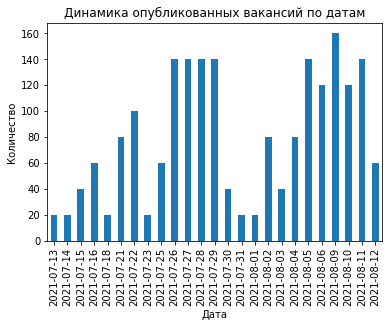

In [18]:
# Постройте график опубликованных вакансий по датам
vacancy_1 = vacancy.groupby(['Date'])['Quantity'].sum()
vacancy_1.plot(kind='bar',title='Динамика опубликованных вакансий по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')

In [19]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacancy['Date'] = pd.to_datetime(vacancy['Date'])
vacancy['day_of_week'] = vacancy['Date'].dt.day_name()
vacancy_2 = vacancy.groupby(['day_of_week'])['Quantity'].sum()
vacancy_2

day_of_week
Friday       240
Monday       380
Saturday      20
Sunday       100
Thursday     480
Tuesday      320
Wednesday    460
Name: Quantity, dtype: int64

In [20]:
# Найдите те вакансии с использованием python, которые вам интересны
vacancy_like = vacancy.loc[(vacancy.Name.str.contains(r'Data Analyst|Дата аналитик$'))]
vacancy_like

,Name,Date,Skills,Quantity,day_of_week
17,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
117,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
217,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
317,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
417,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
517,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
617,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
717,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
817,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday
917,Data Analyst (Junior|Junior+),2021-07-27,{'requirement': 'Понимание теории баз данных. ...,1,Tuesday


<AxesSubplot:xlabel='Quantity', ylabel='Name'>

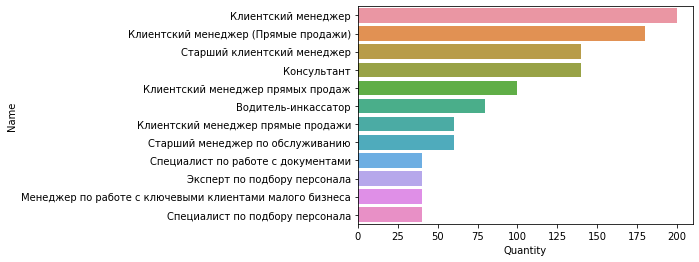

In [21]:
# Постройте график наиболее востребованных вакансий
vacancy_3 = vacancy.groupby('Name').sum().reset_index()
vacancy_3 = vacancy_3.sort_values(by=['Quantity'],ascending =[False])
vacancy_4=vacancy_3.loc[vacancy_3['Quantity'] >= 21]
sns.barplot(data=vacancy_4,x='Quantity',y='Name')

In [58]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий
